Damit dieses Arbeitsblatt funktioniert, musst du als erstes den folgenden Code ausführen. Klicke dazu auf das Code Feld und drücke auf "Run" (oder drücke Shift + Enter).

In [1]:
# Damit das Arbeitsblatt funktioniert, muss das hier stehen.
include("code/loadfunctions.jl");
using Plots;
using LinearAlgebra;

# Rekonstruktion eines Objekts
Nun haben wir es geschafft ein allgemeines Verfahren für die Erstellung der Matrix $A$ des Gleichungssystems $A\cdot\vec{f} = \vec{m}$ zu erstellen. Diese wollen wir nun nutzen, um zunächst ein bekanntes Objekt zu rekonstruieren. Das Verfahren, das wir entwickeln wollen wir dann am Ende auf unbekannte Bilder übertragen. Wir verwenden echte Computertomographie Scanbilder der Brust eines Menschen. Das verwendete Bild sieht wie folgt aus:

![alternative text](figs/CT512x5122.jpg)

Dieses Bild betrachten wir im Folgenden zunächst einmal in weniger guter Auflösung und erhöhen diese immer weiter, um unser Lösungsverfahren auf Genauigkeit zu untersuchen.

## Schritt 1 | Rekonstruktion des Brustkorbes
**a)** Das Bild des Brustkorbes wird durch den folgenden Code aufgerufen. Durch das Verändern der Zahl hinter Aufloesung, kann die Auflösung des Bildes verändert werden. Beachte, dass für die Auflösung nur Zweierpotenzen, also $2^j$, eingegeben werden können.

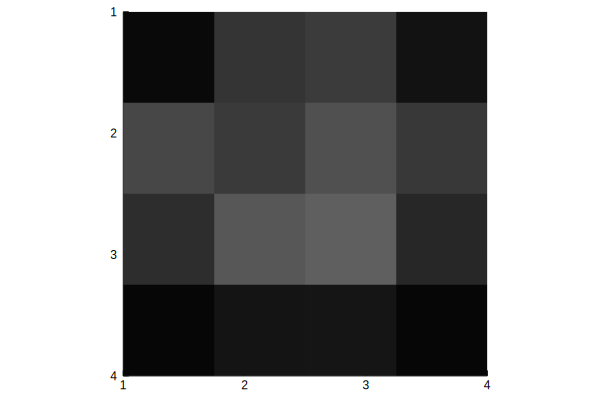

In [2]:
# Zielbild
Aufloesung = 4;
Phantom = CT.echteCTDaten(Aufloesung);
plot(Phantom,ratio = :equal)

Genauso, wie ihr euch bei Aufgabenblatt selbst die Werte für die Messwerte berechnet habt, wurden mit Hilfe dieses Bildes Messwerte berechnet, welche ihr nun im Folgenden verwendet könnt, um das Bild zu rekonstruieren.

**b)**  Setzt oben bei **a)** zunächst für die folgenden Schritte die "Aufloesung = 4". Bestimmt die Grauwerte f_nah des Bildes, dessen Messwerte den Messwerten des gegeben Bildes, genannt Messwerte, am nächsten kommt. Hierbei gilt erneut der Zusammenhang $A\cdot\vec{f}=\vec{m}$.

* Formuliert das Ziel der Optimierung aus der Aufgabenstellung in euren eigenen Worten. ($\bigstar$ Blatt)
* Gebt zur Bestimmung von f_nah zuerst eure erste Formel ein, die ihr verwenden wollt, um die Grauwerte zu bestimmen, die durch die Multiplikation den Messwerten des gegeben Bildes am nächsten kommt. 

    *Hinweis:* Denk zurück an den Vortrag und schaut euch in Hilfekarte 10 erneut das Beispiel an, das gezeigt wurde. 

In [12]:
# erste Formel ohne Umformungen
Formel(A,f_nah,Messwerte) = norm(A*f_nah-Messwerte)^2;

Messwerte,A,OriginalVektor,AnzReihenA,AnzSpaltenA,Schritt = CT.ueberpruefeFormel(Formel,Aufloesung);

Eure Formel für den Abstand ist korrekt!


* Vervollständigt den hier drunter stehenden Satz. Ersetzt dafür Wort3 und Wort4 durch die passenden Wörter oder Zahlen. ($\bigstar$ Blatt)

|Um das Grauwerte des nächsten Bildes zu bestimmen, muss die obige Formel $Wort3$ und gleich $Wort4$ gesetzt werden.|
---

In [13]:
# Satzvervollständigung
Wort3 = "abgeleitet";
Wort4 = "null";

CT.ueberpruefeSatzvervollstaendigung(Wort3,Wort4);

Eure Antwort für Wort3 und Wort4 sind beide korrekt!


* Um das durchzuführen, muss die von euch erstellte Formel erst einmal umgefort werden. Da die von uns verwendete Matrix und der Messwertevektor sehr groß sind, schauen wir uns das ganze an einem kleineren Beispiel an und anschließend wird die Vorgehensweise vom Code in Hintergrund auf unsere komplexere Situation übertragen. 

   Verwendet also im weiteren Verlauf die unten stehende Matrix $A$ und die beiden Vektoren $f\_nah$ und $Messwerte$ und formt eure Formel soweit wie möglich um. Macht diesen Schritt auf dem Papier bis ihr die Formel nicht weiter umformen könnt.

   $A= \pmatrix{A_{1,1}&A_{1,2}\cr A_{2,1}&A_{2,2}}\qquad f\_nah= \pmatrix{f_{1}\cr f_{2}} \qquad Messwerte=\pmatrix{m_{1}\cr m_{2}}$.
   
   Wenn ihr nicht wisst, wie man Matrizen und Vektoren miteinander multipliziert, schaut euch das folgende Video an: [Matrizen-Video](https://www.youtube.com/watch?v=HDZhDx4lQBU&list=PLjaA00udJtOq5N_AcSCFyeE8_OOiQMwmD).
   
   *Erinnerung:* Schaut auf euer Variablen-Blatt um euch zu erinnern, wie auf die Einträge einer Matrix oder einem Vektor zugegeriffen werden.
   
   *Hinweis:* Wenn ihr euren Fehler bei den Umformungen nicht findet, steht die Musterlösung in Hilfekarte 11 als Überprüfung zur Verfügung.

In [14]:
# Formel umgeformt
Formel_neu(f,A,m) = (A[1,1]*f[1]+A[1,2]*f[2]-m[1])^2+(A[2,1]*f[1]+A[2,2]*f[2]-m[2])^2;

CT.ueberpruefeneueFormel(Formel_neu);

Eure Umformungen waren korrekt!
Wir müssen einzeln nach f_1 und f_2 ableiten. Im Ergebnis steht die Ableitung nach f_1 in der ersten und nach f_2 in der zweiten Zeile.
Das Ziel ist es hierfür wieder eine Kurzschreibweise zu finden. Fasst dafür euer Ergbnis soweit wie möglich zusammen.
Berechnet dafür transpose(A)*A*f und transpose(A)*m. Schaut, ob euch das bekannt vorkommt.
transpose(A) nennt man die Transponierte von A.
Macht all diese Schritte auf einem Papier.


Der Unterschied zwischen Matrix $A$ und der transponierten von $A$ ist, dass rot markierten Einträge in der transponierten Matrix ihre Position getauscht haben.

$transpose(A)=\pmatrix{A_{1,1}&\color{red}{A_{2,1}}\cr \color{red}{A_{1,2}}&A_{2,2}}$

* Gebt eure abgeleitete und zusammengefasste Formel hier ein:
  
   *Hinweis:* Zu dieser könnt ihr euch bei Bedarf Hilfekarten 12 und 13 anschauen.

In [15]:
# Ableitung
Ableitung(f_nah) = 2*transpose(A)*A*f_nah-2*transpose(A)*Messwerte;

CT.ueberpruefeAbleitung(Ableitung,A,Messwerte);

Eure Ableitung ist korrekt!


* Formt diese Gleichung nach f_nah um. Um ein Gleichungssystem, wie $A\cdot x=b$ mit Matlab nach $x$ aufzulösen, schreibt man: **x = A\b**.

   *Hinweis:* Zu dieser könnt ihr euch bei Bedarf Hilfekarten 14 und 15 anschauen.

Eure Formel für das nächste Objekt am Original ist korrekt!


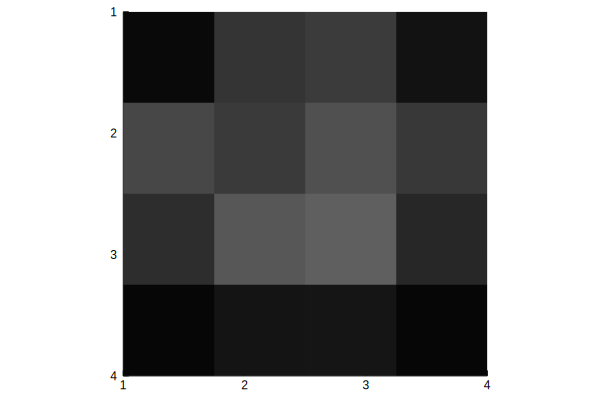

In [16]:
# Nächstes Objekt finden
f_nah = (transpose(A)*A)\(transpose(A)*Messwerte);

f_nah,Bild = CT.ueberpruefef_nah(f_nah,A,Messwerte,Aufloesung,Schritt);
plot(Bild,ratio = :equal)

**c)** Verändert die Auflösung im Codeteil von **a)**. Ihr könnt Zweierpotenzen, also , bis 16 nehmen. Je größer ihr die Dimension wählt, desto länger dauert die Berechnung (bis zu 6 Minuten). Ihr müsst dafür jeden einzelnen Code-Teil erneut durchlaufen lassen. Was beobachtet ihr? ($\bigstar$ Blatt)

Gebt "Aufloesung = 16" ein bevor ihr weiter macht, damit die nächsten Rechnungen nicht zu lange dauern.

**d)** In diesem Aufgabenteil sollt ihr die Qualität eurer Rekonstruktion f_nah beurteilen. Gebt hierfür eine Rechnung für den relativen Fehler der Rekonstruktion verglichen zum ursprünglichen Bild an. Interpretiert das Ergebnis in Bezug auf die Qualität des Bildes. ($\bigstar$ Blatt)

In [17]:
# Berechung des Fehlers
Fehler = norm(OriginalVektor-f_nah)/norm(OriginalVektor)*100;

CT.ueberpruefeerror(Fehler,OriginalVektor,f_nah);

0.0
Eure Formel für den relativen Fehler ist korrekt!


Bisher haben wir angenommen, dass unsere Messdaten aus dem Computertomographen exakt sind und wir keine Messfehler haben. Natürlich ist das im Allgemeinen bei Messgeräten nicht so. Das bedeutet, dass wir in unserer Rechnung noch Messfehler mit berücksichtigen müssen.

**e)** Lasst den folgenden Codeteil durchlaufen. Dieser sorgt dafür, dass ein Fehlerrauschen komponentenweise auf die Messdaten gelegt wird. Dadurch erhaltet ihr fehlerbehaftete Messdaten **MesswerteMitFehler** für die nächsten Schritte.

In [18]:
# Fehlerrauschen
MesswerteMitFehler,Schritt = CT.erzeugeFehlerbehafteteDaten(Messwerte); # alles durch 64 ersetzen eigenlich

**f)** Mit diesen fehlerhaften Daten MesswerteMitFehler sehen natürlich auch die rekonstruierten Bilder anders aus. Gebt hier eure Formel aus **Schritt 1 b)** erneut ein, damit ihr euch die Rekonstruktion anschauen könnt. Vergleicht die Rekonstruktion mit der ersten. ($\bigstar$ Blatt)

Eure Formel für f_nahfehler ist korrekt!


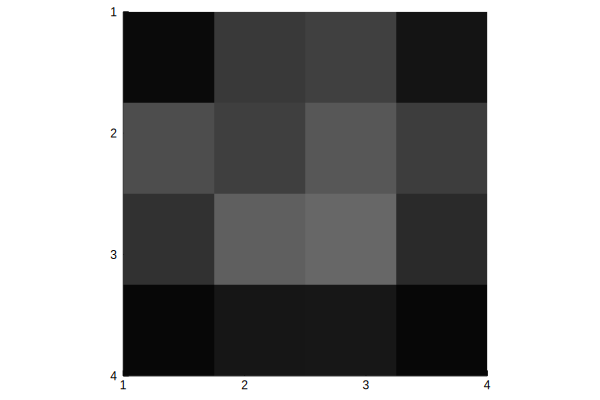

In [19]:
# Rekonstruktion des Phantoms
f_nahfehler = (transpose(A)*A)\(transpose(A)*MesswerteMitFehler);

f_nahfehler, Bild = CT.ueberpruefef_nah(f_nahfehler,A,MesswerteMitFehler,Aufloesung,Schritt);
plot(Bild,ratio = :equal)

**g)** Beurteilt erneut die Qualität eurer Rekonstruktion, indem ihr die gleiche Formel wie in **Schritt 1 d)** verwendet. ($\bigstar$ Blatt)

In [20]:
# Berechung des Fehlers
Fehler = norm(OriginalVektor-f_nahfehler)*100/norm(OriginalVektor);

CT.ueberpruefeerror(Fehler,OriginalVektor,f_nahfehler);

8.6677
Eure Formel für den relativen Fehler ist korrekt!


Der große Fehler aus Schritt 1 zeigt, dass die Rekonstruktionsmethode optimiert werden muss. 

## Schritt 2 | Verbesserung der Rekonstruktionsmethode des Bildes
**a)** Schaut euch die Formel für den Fehler noch einmal und findet heraus, welcher Teil der Formel dafür zuständig ist, dass der Fehler so groß ist.

In [21]:
# Größe des Fehlers
Schuld = f_nahfehler-OriginalVektor; # Alternative: f_nahfehler

CT.ueberpruefeSchuld(Schuld,f_nahfehler,OriginalVektor);

Eure Antwort ist korrekt!


**b)** Um das Bild mit fehlerbehafteten Daten besser zu rekonstruieren, benötigen wir eine neue Formel, da $||A\cdot \vec{f}_{nahfehler}-\vec{m}||_2^2$ aus **Schritt 1 b)** nicht ausreicht. Schaut man sich die Größe der Einträge von f_nahfehler an, so stellt man fest, dass diese sehr viel größer sind, als die aus f_nah. Es muss eine Formel erstellt werden, die dafür sorgt, dass die Einträge von f_nahfehler klein bleiben. Das erreicht man durch das addieren eines kleinen Summandens: 

$||A\cdot \vec{f}_{nahfehler}-\vec{m}||_2^2+p\cdot||\vec{f}_{nahfehler}||_2^2$.

Durch die Gleiche Vorgehensweise, ableiten und gleich Null setzen, wie bei **Schritt 1 b)** kann hier f_nahfehler bestimmt werden. Es muss jedoch noch das optimale p bestimmt werden, so dass der Fehler minimiert wird. 

Setzt hierfür Zahlen für p ein und probiert die bestmögliche Rekonstruktion f_optimal zu erzeugen. Bearbeitet für jedes eingegebene p auch den nächsten Aufgabenteil **c)**.

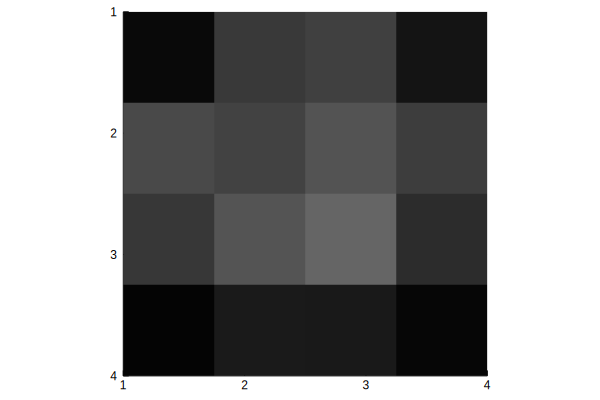

In [22]:
# Optimales p finden
p = 0.2;

f_optimal,Bild = CT.ueberpruefep(A,MesswerteMitFehler,Aufloesung,p,AnzSpaltenA);
plot(Bild,ratio = :equal)

**c)** Beurteilt erneut die Qualität eurer optimalen Rekonstruktion, indem ihr die gleiche Formel wie in **Schritt 1 d)** verwendet. ($\bigstar$ Blatt)

In [23]:
# Berechung des Fehlers
Fehler = norm(OriginalVektor-f_optimal)/norm(OriginalVektor)*100;

CT.ueberpruefeerror(Fehler,OriginalVektor,f_optimal);

9.0541
Eure Formel für den relativen Fehler ist korrekt!


# Zusatzaufgabe zur Bestimmung von f_nahfehler
Bei **Schritt 2 b)** wurde euch folgendes gesagt: Um das Bild mit fehlerbehafteten Daten besser zu rekonstruieren, benötigen wir eine neue Formel, da die aus **Schritt 1 b)** $||A\cdot \vec{f}_{nahfehler}-\vec{m}||_2^2$ nicht ausreicht. Schaut man sich die Größe der Einträge von f_nahfehler an, so stellt man fest, dass diese sehr viel größer sind, als die aus f_nah. Es muss eine Formel erstellt werden, die dafür sorgt, dass die Einträge von f_nahfehler klein bleiben. Das erreicht man durch das addieren eines kleinen Summandens: 

$||A\cdot \vec{f}_{nahfehler}-\vec{m}||_2^2+p\cdot||\vec{f}_{nahfehler}||_2^2$.

Formt diese Formel, so um, wie ihr es bei **Schritt 1 b)** gemacht habt und bestimmt eine Formel für f_nahfehler. Überlegt, was ihr aus Schritt 1 b) direkt übernehmen könnt, bevor ihr loslegt.

Die einzelnen Schritte waren die Folgenden:

* Um die Formel abzuleiten und gleich Null setzen zu können, muss die obige Formel erst einmal umgefort werden. Formt die Formel soweit wie möglich um, indem ihr die folgende Matrix und die folgenden Vektoren verwendet:

    $A= \pmatrix{A_{1,1}&A_{1,2}\cr A_{2,1}&A_{2,2}}\qquad trans(A)= \pmatrix{A_{1,1}&A_{2,1}\cr A_{1,2}&A_{2,2}}\qquad f\_nahfehler= \pmatrix{f_{1}\cr f_{2}} \qquad Messwerte=\pmatrix{m_{1}\cr m_{2}}$.

* Formt diese Gleichung nach f_nahfehler um. Um ein Gleichungssystem, wie  mit Matlab nach  aufzulösen, schreibt man: x = A\b.

    *Hinweis:* Für diese Aufgabe könnt ihr euch bei Bedarf Hilfekarte 16 anschauen.

In [29]:
# Nächstes Objekt finden
f_nahfehlerneu(p) = (transpose(A)*A+p*I)\(transpose(A)*MesswerteMitFehler);

ueberpruefef_nahfehler(f_nahfehlerneu,A,MesswerteMitFehler);

Eure Formel für das nächste Objekt am Original ist korrekt!
